In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from sklearn import decomposition
from ipywidgets import interact, IntSlider
import scipy.ndimage as ndimage

In [140]:
apo = plt.imread('apo-sinyal.jpg',)[:, :, 0]
# apo = ndimage.gaussian_filter(apo, sigma=3)
apo = apo[::1, ::1]

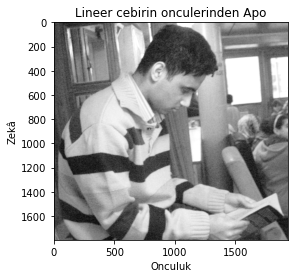

In [141]:
plt.imshow(apo, cmap='gray');
plt.title("Lineer cebirin onculerinden Apo");
plt.xlabel("Onculuk")
plt.ylabel("Zekâ");

In [149]:
U, S, V = np.linalg.svd(apo / 255. - 0.5)

[]

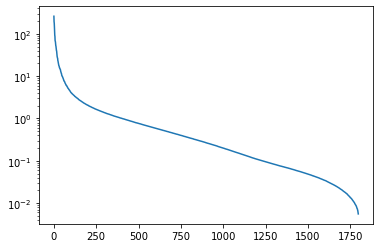

In [150]:
plt.plot(S)
plt.semilogy()

In [124]:
apo.size

217800

In [136]:
@interact
def apoviz(
    k=IntSlider(min=1, max=min(apo.shape), value=30, step=1, description='Rank:'),
    gaussian_blur=IntSlider(min=0, max=10, value=0, step=1, description='Gaussian Blur:'),
    ):
    siki_resim = (U[:, :k] @ np.diag(S[:k]) @ V[:k, :]).astype(np.uint8)
    oran = (U.shape[0] + 1 + V.shape[0])*k / (apo.size)
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 2)
    plt.imshow(ndimage.gaussian_filter(siki_resim, (gaussian_blur)), cmap='gray')
    plt.title(f"Lineer cebirin onculerinden Apo - Rank {k} | Sikistirma orani: %{oran*100:.2f}")
    plt.xlabel("Onculuk")
    plt.ylabel("Zekâ");
    plt.subplot(1, 2, 1)
    plt.imshow(apo, cmap='gray')
    plt.title("Lineer cebirin onculerinden Apo - Orijinal")
    plt.xlabel("Onculuk")
    plt.ylabel("Zekâ");

interactive(children=(IntSlider(value=30, description='Rank:', max=450, min=1), IntSlider(value=0, description…

<img src="gargi_s.jpg" width="300" height="400"></img>